# Calculating Protein Cation-Pi and Pi-PiBonds

We identify cation-pi and pi-pi bonds for a 38 residue long protein in 150 mmol NaCl.

The sequence is KAKKYYYKYKNSGKYKYLKKARKYHRKGYKKYYGGGSS, which is half of the total sequence for mussel foot protein 5 of the Mediterranean mussel, *Mytilus galloprovincialis*.

Packages Required:

- MDAnalysis
- matplotlib
- os

In [23]:
from cation_pi_analysis import CationPiBondAnalysis
import MDAnalysis as mda
import matplotlib.pyplot as plt
import os

## Establish a Directory to Save Output Files

In [24]:
out_path = f'{os.getcwd()}/cation_pi_analysis_demo_out'
if os.path.exists(out_path) == False:
    os.mkdir(out_path)

## Loading Trajectory into Universe

In [25]:
project_path = f"{os.getcwd()}/demo_trajectory"
psf_in=f'{project_path}/ionized.psf'
dcd_in=f'{project_path}/trajectory.dcd'
u = mda.Universe(psf_in, dcd_in, in_memory=True, dt=2500)

## Find cation-pi bonds

The CationPiBondAnalysis class requires passing a pi system atom selection (`pi_sel`), a distance cutoff, and a cation atom selection (`cations_sel`) to `CationPiBondAnalysis`. 

In the following cell, `pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)"` will select atoms in the pi system of tyrosine's sidechain. `cations_sel="(resname LYS and name NZ) or (resname ARG and name CZ)"` will select atoms in the sidechains of lysine and arginine that carry a net positive charge of +1. `c_p_cutoff` is set to 5.0, which is the minimum distances between the average position of atoms in each ring and an atom in cation sel to detect a cation pi bond.

Currently, angle of sidechain interaction is not taken into account, but may be added by the user.

In [26]:
cation_pi_bonds = CationPiBondAnalysis(
    universe=u,
    pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)",
    cations_sel="(resname LYS and name NZ) or (resname ARG and name CZ)",
    c_p_cutoff=5.0,
    update_selections=True
)

We then use the `run()` method to perform the analysis. If we do not set the `start`, `stop`, and `step` for frames to analyse, all frames will be used.

In [27]:
cation_pi_bonds.run(verbose=True,
                         start=None,
                         stop=None,
                         step=1)

  0%|          | 0/60 [00:00<?, ?it/s]

## Accessing the results

Cation pi bond data are returned in a `numpy.ndarray` on a "one line, one observation" basis which can be accessed via `CationPiBondAnalysis.results['cation_pi_bonds']`. 

The total count of cation pi bonds at each frame can be accessed via `CationPiBondAnalysis.results['cation_pi_bond_counts']` which lists the total number of cation pi bonds detected in each frame.

The corresponding time can be accessed via `CationPiBondAnalysis.times`.

### Example

In [28]:
cation_pi_bonds.results['cation_pi_bonds']

array([[0, <Atom 19: NZ of type NH3 of resname LYS, resid 1 and segid U>,
        <AtomGroup with 6 atoms>, 3.0210554583620968],
       [0,
        <Atom 158: NZ of type NH3 of resname LYS, resid 8 and segid U>,
        <AtomGroup with 6 atoms>, 3.179213124417567],
       [0,
        <Atom 201: NZ of type NH3 of resname LYS, resid 10 and segid U>,
        <AtomGroup with 6 atoms>, 3.579311915784522],
       ...,
       [59,
        <Atom 497: CZ of type CAG of resname ARG, resid 26 and segid U>,
        <AtomGroup with 6 atoms>, 4.98737972398087],
       [59,
        <Atom 497: CZ of type CAG of resname ARG, resid 26 and segid U>,
        <AtomGroup with 6 atoms>, 4.1158151108336165],
       [59,
        <Atom 594: NZ of type NH3 of resname LYS, resid 31 and segid U>,
        <AtomGroup with 6 atoms>, 3.66391105921277]], dtype=object)

In [29]:
cation_pi_bonds.results['cation_pi_bond_counts']

[8,
 8,
 5,
 6,
 5,
 5,
 5,
 6,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 9,
 5,
 6,
 4,
 6,
 7,
 4,
 7,
 6,
 7,
 7,
 7,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 6,
 6,
 5,
 7,
 5,
 5,
 6,
 6,
 5,
 6,
 4,
 6,
 6,
 7,
 8,
 5,
 4,
 6,
 5,
 5,
 5,
 7,
 3,
 3,
 7]

In [30]:
cation_pi_bonds.times

array([     0.,   2500.,   5000.,   7500.,  10000.,  12500.,  15000.,
        17500.,  20000.,  22500.,  25000.,  27500.,  30000.,  32500.,
        35000.,  37500.,  40000.,  42500.,  45000.,  47500.,  50000.,
        52500.,  55000.,  57500.,  60000.,  62500.,  65000.,  67500.,
        70000.,  72500.,  75000.,  77500.,  80000.,  82500.,  85000.,
        87500.,  90000.,  92500.,  95000.,  97500., 100000., 102500.,
       105000., 107500., 110000., 112500., 115000., 117500., 120000.,
       122500., 125000., 127500., 130000., 132500., 135000., 137500.,
       140000., 142500., 145000., 147500.])

## Plotting the Results

The total number of cation pi bonds detected at each frame is plotted below.

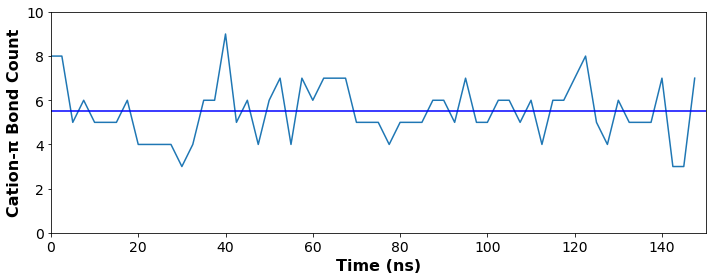

In [31]:
fig = plt.figure(figsize=([10,4]))
plt.plot(cation_pi_bonds.times/1000, cation_pi_bonds.results['cation_pi_bond_counts'])
plt.axhline(y=sum(cation_pi_bonds.results['cation_pi_bond_counts'])/len(cation_pi_bonds.results['cation_pi_bond_counts']),label=None,c='blue')
plt.xlabel('Time (ns)',fontweight='bold',fontsize=16)
plt.ylabel(f'Cation-\u03C0 Bond Count',fontweight='bold',fontsize=16)
plt.ylim([0,10])
plt.xlim([0,150])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f'{out_path}/cation_pi_150ns_plot.jpeg') # Print plot to {out_path}/cation_pi_150ns_plot.jpeg
plt.show()

# Find Pi-Pi Bonds

In [32]:
from pi_pi_analysis import PiPiBondAnalysis

## Find pi-pi bonds

The PiPiBondAnalysis class requires passing a pi system atom selection (`pi_sel`) and distance cutoff to `PiPiBondAnalysis`. 

In the following cell, `pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)"` will select atoms in the pi system of tyrosine's sidechain. `p_p_cutoff` is set to 6.0, which is the minimum distances between the centroid (average position of atoms) of two rings to detect a pi pi bond.

Currently, angle of sidechain interaction is not taken into account, but may be added by the user.

In [33]:
pi_pi_bonds = PiPiBondAnalysis(
    universe=u,
    pi_sel="resname TYR and (name CG CD1 CD2 CE1 CE2 CZ)",
    p_p_cutoff=6.0,
    update_selections=True
)

We then use the `run()` method to perform the analysis. If we do not set the `start`, `stop`, and `step` for frames to analyse, all frames will be used.

In [34]:
pi_pi_bonds.run(verbose=True,
                         start=None,
                         stop=None,
                         step=1)

  0%|          | 0/60 [00:00<?, ?it/s]

/Users/Jacob/Desktop/mdanalysis_protein_cation_pi_bond_detection/pi_pi_analysis.py:125: UserWarning: No pi pi bonds were found given p-p cutoff of 6.0 for Pi System, resname TYR and (name CG CD1 CD2 CE1 CE2 CZ) at step < Timestep 0 with unit cell dimensions [82.559296 76.60282  71.66238  90.       90.       90.      ] >.
  warnings.warn(
/Users/Jacob/Desktop/mdanalysis_protein_cation_pi_bond_detection/pi_pi_analysis.py:125: UserWarning: No pi pi bonds were found given p-p cutoff of 6.0 for Pi System, resname TYR and (name CG CD1 CD2 CE1 CE2 CZ) at step < Timestep 1 with unit cell dimensions [82.49138 76.5398  71.60342 90.      90.      90.     ] >.
  warnings.warn(
/Users/Jacob/Desktop/mdanalysis_protein_cation_pi_bond_detection/pi_pi_analysis.py:125: UserWarning: No pi pi bonds were found given p-p cutoff of 6.0 for Pi System, resname TYR and (name CG CD1 CD2 CE1 CE2 CZ) at step < Timestep 6 with unit cell dimensions [82.4835   76.532486 71.59658  90.       90.       90.      ] >.
  w

## Accessing the results

Pi pi bond data are returned in a `numpy.ndarray` on a "one line, one observation" basis which can be accessed via `PiPiBondAnalysis.results['pi_pi_bonds']`. 

The total count of pi pi bonds at each frame can be accessed via `PiPiBondAnalysis.results['pi_pi_bond_counts']` which lists the total number of pi pi bonds detected in each frame.

The corresponding time can be accessed via `PiPiBondAnalysis.times`.

### Example

In [35]:
pi_pi_bonds.results['pi_pi_bonds']

array([[2.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.855235365295239],
       [2.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.894844930828925],
       [3.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.583524924971388],
       [4.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.458810801497574],
       [4.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        4.687440090591191],
       [5.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.62352492292816],
       [5.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.393935453984969],
       [5.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.013175543269014],
       [7.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.939080037819327],
       [8.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
        5.133071539399256],
       [8.0, <AtomGroup with 6 atoms>, <AtomGroup with 6 atoms>,
      

In [36]:
pi_pi_bonds.results['pi_pi_bond_counts']

[0,
 0,
 2,
 1,
 2,
 3,
 0,
 1,
 3,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 4,
 4,
 2,
 2,
 1]

In [37]:
pi_pi_bonds.times

array([     0.,   2500.,   5000.,   7500.,  10000.,  12500.,  15000.,
        17500.,  20000.,  22500.,  25000.,  27500.,  30000.,  32500.,
        35000.,  37500.,  40000.,  42500.,  45000.,  47500.,  50000.,
        52500.,  55000.,  57500.,  60000.,  62500.,  65000.,  67500.,
        70000.,  72500.,  75000.,  77500.,  80000.,  82500.,  85000.,
        87500.,  90000.,  92500.,  95000.,  97500., 100000., 102500.,
       105000., 107500., 110000., 112500., 115000., 117500., 120000.,
       122500., 125000., 127500., 130000., 132500., 135000., 137500.,
       140000., 142500., 145000., 147500.])

## Plotting the Results

The total number of pi pi bonds detected at each frame is plotted below.

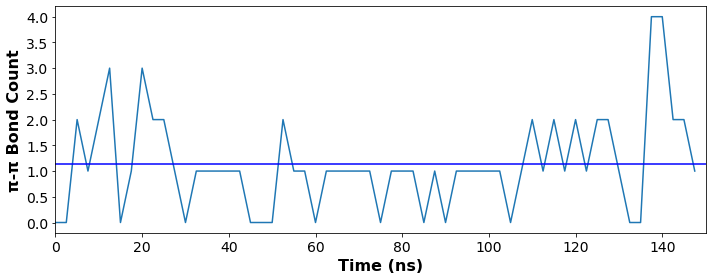

In [38]:
fig = plt.figure(figsize=([10,4]))
plt.plot(pi_pi_bonds.times/1000, pi_pi_bonds.results['pi_pi_bond_counts'])
plt.axhline(y=sum(pi_pi_bonds.results['pi_pi_bond_counts'])/len(pi_pi_bonds.results['pi_pi_bond_counts']),label=None,c='blue')
plt.xlabel('Time (ns)',fontweight='bold',fontsize=16)
plt.ylabel(f'\u03C0-\u03C0 Bond Count',fontweight='bold',fontsize=16)
# plt.ylim([0,10])
plt.xlim([0,150])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f'{out_path}/pi_pi_150ns_plot.jpeg') # Print plot to {out_path}/pi_pi_150ns_plot.jpeg
plt.show()